### Heatmaps for SVM algorithm

I rerun my code for my rbf-SVM algorithms per Dataset to reset all the variables. Then after each run I print out a heatmap of their performance per hyperparameter setting! Once again, i removed the outputs frome ach algorithm as to not make this notebook 10x longer.

In [ ]:
# The following code in this block is for my Dry Bean Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    beanData = shuffle(beanData) 
    
    # Setting up X values to be all variables except the area, and Y values to 
    # be the area column.
    X = beanData.drop('Area', axis = 1)  
    Y = beanData['Area'] 
    
    # Printing the number of each iteration as we go up.
    print("Trial Number:", iterations + 1)  

    
    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my rbf-SVM algorithms. 
        for alg in range(1):
            if alg == 0:
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))

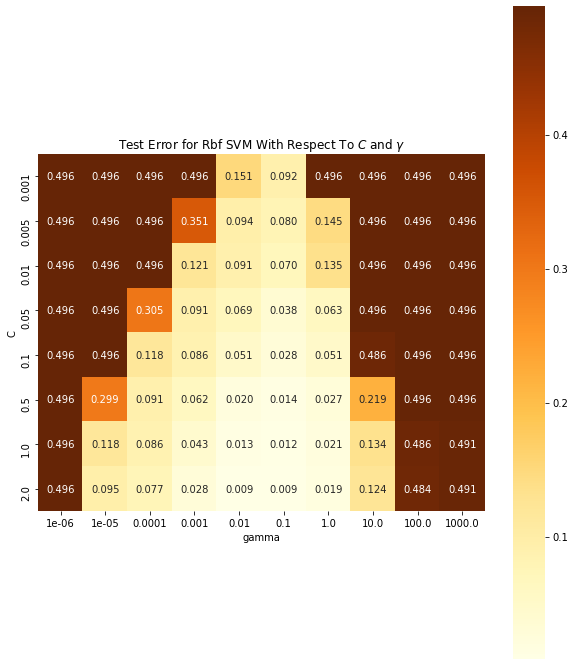

In [5]:
### Heatmap using Dry bean Dataset.
## Heatmap code for RBG kernel.
# We get the parameters used in the order they were used for the RBF Kernel:
results_rbf = pd.DataFrame(GridSearchcvRBF.cv_results_['params'] )

# Next we grab the score resulting from those parameters, and add it 
# to the data. Our score is accuracy; I then use 1 - x to display it 
# as misclassification error.
results_rbf['score'] = 1 - GridSearchcvRBF.cv_results_['mean_test_score']

# Setting C to be the y-axis and gamma as the x-axis
results_rbf = results_rbf.pivot('C','gamma','score')

# Plot it using the dataframe means.
plt.subplots(figsize = (10,12))
sns.heatmap(results_rbf, annot = True, 
            square = True, fmt='.3f', cmap="YlOrBr") 
plt.title('Test Error for Rbf SVM With Respect To $C$ and $\gamma$')
plt.show()

In [ ]:
# The following code in this block is for my Skin Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    skinData = shuffle(skinData) 
    
    # Setting up X values to be all variables except the Y column, 
    # and Y values to be the Y column. 
    X = skinData.drop('Y', axis = 1)  
    Y = skinData['Y']  
    
    # Printing the number of each iteration as we go up.
    print("Trial Number:", iterations + 1)  

    
    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my rbf-SVM algorithms. 
        for alg in range(1):
            if alg == 0:
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))

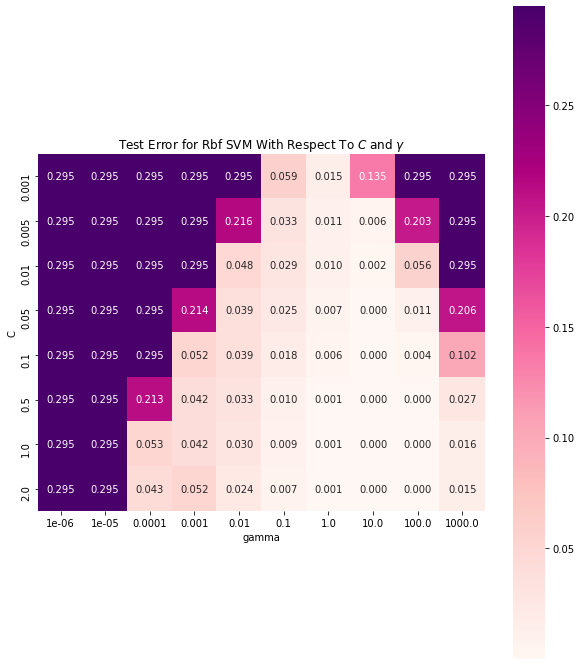

In [5]:
### Heatmaps using Skin Dataset.
## Heatmap code for RBG kernel.
# We get the parameters used in the order they were used for the RBF Kernel:
results_rbf = pd.DataFrame(GridSearchcvRBF.cv_results_['params'] )

# Next we grab the score resulting from those parameters, and add it to 
# the data. Our score is accuracy; I then use 1 - x to display it as 
# misclassification error.
results_rbf['score'] = 1 - GridSearchcvRBF.cv_results_['mean_test_score']

# Setting C to be the y-axis and gamma as the x-axis
results_rbf = results_rbf.pivot('C','gamma','score')

# Plot it using the dataframe means.
plt.subplots(figsize = (10,12))
sns.heatmap(results_rbf, annot = True, square = True, fmt='.3f', cmap="RdPu") 
plt.title('Test Error for Rbf SVM With Respect To $C$ and $\gamma$')
plt.show()

In [ ]:
# The following code in this block is for my Adult Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    adultData = shuffle(adultData) 
    
    # Assiigning X values to be all columns except salary, 
    # and Y values to be salary.
    X = adultData.drop('salary', axis = 1)
    Y = adultData['salary']
    
    # Printing the number of each iteration as we go up.
    print("Trial Number:", iterations + 1)  

    
    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my rbf-SVM algorithms. 
        for alg in range(1):
            if alg == 0:
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))

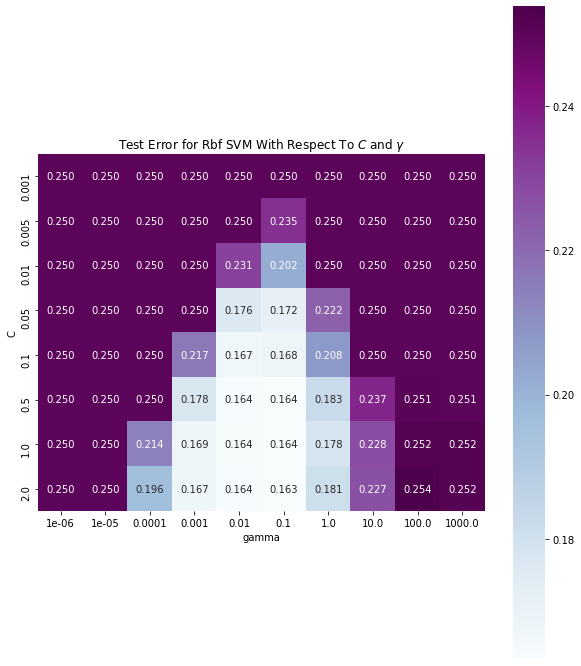

In [5]:
### Heatmaps using Adult Dataset.
## Heatmap code for RBG kernel.
# We get the parameters used in the order they were used for the RBF Kernel:
results_rbf = pd.DataFrame(GridSearchcvRBF.cv_results_['params'] )

# Next we grab the score resulting from those parameters, and add it to 
# the data. Our score is accuracy; I then use 1 - x to display it as 
# misclassification error.
results_rbf['score'] = 1 - GridSearchcvRBF.cv_results_['mean_test_score']

# Setting C to be the y-axis and gamma as the x-axis
results_rbf = results_rbf.pivot('C','gamma','score')

# Plot it using the dataframe means.
plt.subplots(figsize = (10,12))
sns.heatmap(results_rbf, annot = True, square = True, fmt='.3f', cmap="BuPu") 
plt.title('Test Error for Rbf SVM With Respect To $C$ and $\gamma$')
plt.show()

In [ ]:
# The following code in this block is for my Letter Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    letterData = shuffle(letterData) 
    
    # Setting up X values to be everything except the letter column, 
    # and Y values to be the letter column.
    X = letterData.drop('letter', axis = 1)
    Y = letterData['letter'] 
    
    # Printing the number of each iteration as we go up.
    print("Trial Number:", iterations + 1)  

    
    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my rbf-SVM algorithms. 
        for alg in range(1):
            if alg == 0:
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))

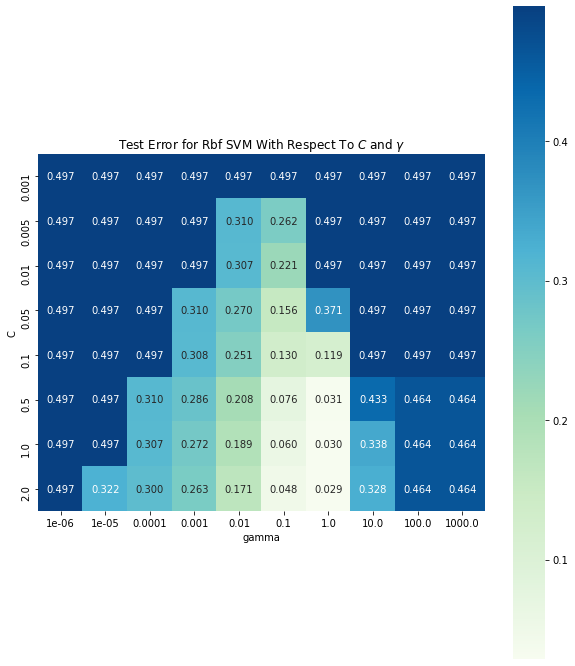

In [7]:
### Heatmaps using Letter Dataset.
## Heatmap code for RBG kernel.
# We get the parameters used in the order they were used for the RBF Kernel:
results_rbf = pd.DataFrame(GridSearchcvRBF.cv_results_['params'] )

# Next we grab the score resulting from those parameters, and add it to 
# the data. Our score is accuracy; I then use 1 - x to display it as 
# misclassification error.
results_rbf['score'] = 1 - GridSearchcvRBF.cv_results_['mean_test_score']

# Setting C to be the y-axis and gamma as the x-axis
results_rbf = results_rbf.pivot('C','gamma','score')

# Plot it using the dataframe means.
plt.subplots(figsize = (10,12))
sns.heatmap(results_rbf, annot = True, square = True, fmt='.3f', cmap="GnBu") 
plt.title('Test Error for Rbf SVM With Respect To $C$ and $\gamma$')
plt.show()